<a href="https://colab.research.google.com/github/grupo21dex/deliverable-2/blob/main/Deliverable2_grupo21_dex04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DataFrames:
*   df: É o dataframe original, foram realizadas algumas alterações ao longo do projeto
*   df_corr: Dataframe criado a partir do dataframe original, usado colunas elegíveis para fazermos correlações
*   df_super: Dataframe contendo apenas informações do feriado ***Super_Boul***
*   df_labour: Dataframe contendo apenas informações do feriado ***Labour_Day***
*   df_thanks: Dataframe contendo apenas informações do feriado ***Thanksgiving***
*   df_christ: Dataframe contendo apenas informações do feriado ***Christmans***
*   df_regular: Dataframe contendo apenas dias comuns ***Regular_Day***
*   df_loja: dataframe com as médias das colunas relevantes de cada loja



##Listas:
*   Holiday_Type: Lista criada para definir se o dia é um dia comum ou, caso feriado, qual o tipo de feriado

##Colunas adicionais:
*   Holiday_Type: Usamos a lista ***Holiday_Type*** para criar essa coluna
*   Day: Coluna criada a partir da coluna ***Date***, para definir o dia
*   Month: Coluna criada a partir da coluna ***Date***, para definir o mês
*   Year: Coluna criada a partir da coluna ***Date***, para definir o ano








#Bibliotecas

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

---

#Conhecendo os dados

Dataframe original

In [3]:
df = pd.read_csv('Walmart.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


Descrição das colunas e data dos feriados

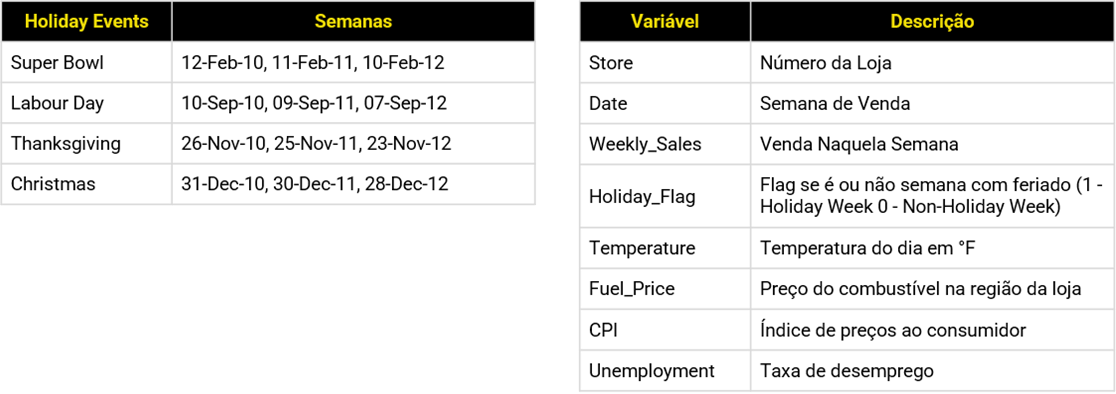

---

#Verificando qualidade dos dados

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Verificando se temos a mesma quantidade de dados em cada loja

In [5]:
df['Store'].value_counts()

1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: Store, dtype: int64

Identificando outiliers

Função limite_outiliers que determina os outliers 

In [98]:
def limite_outiliers(atributo):
  q1= atributo.quantile(0.25) # primeiro quartil
  q3= atributo.quantile(0.75) # segundo quartil
  amplitude = q3 - q1
  return (q1 - (1.5 * amplitude)), (q3 + (1.5 * amplitude)) # retorna uma tupla com os valores:  limite inferior e limite superior

Usando a função limite_outliers para verificar os valores outliers para a coluna ***Weekly_Sales***

In [99]:
print(limite_outiliers(df['Weekly_Sales']))

(-746862.7275, 2720371.4924999997)


 Funções diagrama_caixa, histograma, grafico_barra, que criam graficos, ao utilizar em uma coluna

In [101]:
def diagrama_caixa(coluna):
  fig, (ax1, ax2) = plt.subplots(1,2)
  fig.set_size_inches(15,5)
  sns.boxplot(x=coluna, ax=ax1,showmeans=True)
  ax2.set_xlim(limite_outiliers(coluna))
  sns.boxplot(x=coluna, ax=ax2,showmeans=True)

def histograma(coluna):
  plt.figure(figsize=(15,5))
  sns.distplot(coluna, hist= True)

Gráfico exibindo os outliers da coluna ***Weekly_Sales***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


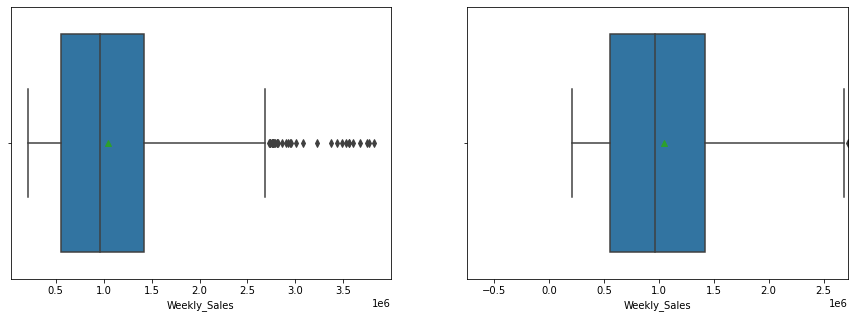

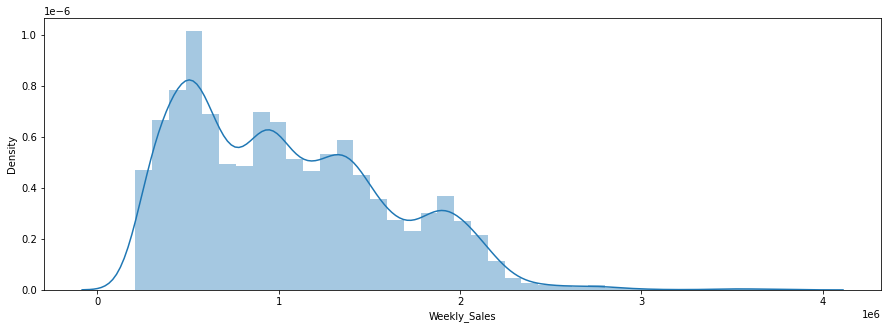

In [102]:
diagrama_caixa(df['Weekly_Sales'])
histograma(df['Weekly_Sales'])

Como são poucas lojas que foram divididas em datas optamos por não excluir os outliers.

---

Verificando se há somente valores 0 e 1 na coluna ***Holiday_Flag***

In [7]:
pd.DataFrame(df['Holiday_Flag'].value_counts())

,Holiday_Flag
0,5985
1,450


---

#Criando novas colunas

Criando a lista ***Holiday_Type*** que coloca o nome do feriado em sua data (***Super_Boul, Labour_Day, Thanksgiving, Christmans***) ou se é dia comum (***Regular_Day***)

In [8]:
Holiday_Type = list()	
for x,y in enumerate(df['Holiday_Flag']):
  if y == 0:
    Holiday_Type.append('Regular_Day')
  elif y == 1:
    if df['Date'][x] == '12-02-2010' or df['Date'][x] == '11-02-2011' or df['Date'][x] == '10-02-2012':
      Holiday_Type.append('Super_Boul')
    if df['Date'][x] == '10-09-2010' or df['Date'][x] == '09-09-2011' or df['Date'][x] == '07-09-2012':
      Holiday_Type.append('Labour_Day')
    if df['Date'][x] == '26-11-2010' or df['Date'][x] == '25-11-2011' or df['Date'][x] == '23-11-2012':
      Holiday_Type.append('Thanksgiving')
    if df['Date'][x] == '31-12-2010' or df['Date'][x] == '30-12-2011' or df['Date'][x] == '28-12-2012':
      Holiday_Type.append('Christmans')
len(Holiday_Type)

6435

In [9]:
df['Holiday_Type'] = Holiday_Type
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Type
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,Regular_Day
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,Super_Boul
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,Regular_Day
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,Regular_Day
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,Regular_Day
...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,Regular_Day
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,Regular_Day
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,Regular_Day
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,Regular_Day


Criando as colunas ***Day, Month e Year***

In [10]:
df[["Day", "Month", "Year"]] = df["Date"].str.split("-", expand = True)
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Type,Day,Month,Year
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,Regular_Day,05,02,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,Super_Boul,12,02,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,Regular_Day,19,02,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,Regular_Day,26,02,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,Regular_Day,05,03,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,Regular_Day,28,09,2012
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,Regular_Day,05,10,2012
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,Regular_Day,12,10,2012
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,Regular_Day,19,10,2012


Criando a coluna Day_Year, que servira para reduzirmos as datas por mes e ano para usarmos para criação de gráfico

In [11]:
df['Month_Year'] = df['Month']+'/'+df['Year']
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Type,Day,Month,Year,Month_Year
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,Regular_Day,05,02,2010,02/2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,Super_Boul,12,02,2010,02/2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,Regular_Day,19,02,2010,02/2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,Regular_Day,26,02,2010,02/2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,Regular_Day,05,03,2010,03/2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,Regular_Day,28,09,2012,09/2012
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,Regular_Day,05,10,2012,10/2012
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,Regular_Day,12,10,2012,10/2012
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,Regular_Day,19,10,2012,10/2012


Transformando o tipo da coluna ***Date*** em datetype para fazer comparações temporais

In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Type,Day,Month,Year,Month_Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Regular_Day,05,02,2010,02/2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Super_Boul,12,02,2010,02/2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Regular_Day,19,02,2010,02/2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Regular_Day,26,02,2010,02/2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Regular_Day,05,03,2010,03/2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,Regular_Day,28,09,2012,09/2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,Regular_Day,05,10,2012,10/2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,Regular_Day,12,10,2012,10/2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,Regular_Day,19,10,2012,10/2012


#Criação de dataframes

Criando df_loja: que contém as médias das colunas relevantes para fazermos comparativos entre as lojas

In [13]:
df_loja = (df.groupby('Store').agg({'Weekly_Sales':'mean','Temperature':'mean','Fuel_Price':'mean', 'CPI':'mean','Unemployment':'mean'})).reset_index().copy()

Renomeando as colunas para média

In [14]:
df_loja.rename(columns = {'Weekly_Sales':'Mean_Sales','Temperature':'Mean_Temperature','CPI':'Mean_CPI','Unemployment':'Mean_Unemployment'}, inplace = True)

#OBS: recolocar no local em que foram feitos os comparativos de data max/min

In [15]:
df_mean = (df.groupby('Store').agg({'Weekly_Sales':'mean'})).reset_index().copy()
df_mean.rename(columns = {'Weekly_Sales':'Mean_Sales'}, inplace = True)

In [16]:
df_max = (df.groupby('Store').agg({'Weekly_Sales':'max'})).reset_index().copy()
df_max.rename(columns = {'Weekly_Sales':'Max_Sales'}, inplace = True)

In [17]:
df_min = (df.groupby('Store').agg({'Weekly_Sales':'min'})).reset_index().copy()
df_min.rename(columns = {'Weekly_Sales':'Min_Sales'}, inplace = True)

Criação do dataframe df_sales que contém a media de vendas, a maior venda, a menor e a amplitude

In [18]:
df_mean['Max_Sales'] = df_max['Max_Sales']
df_mean['Min_Sales'] = df_min['Min_Sales']
df_sales = df_mean
df_sales['Amplitude'] = df_sales['Max_Sales'] - df_sales['Min_Sales']
df_sales.head(5)

,Store,Mean_Sales,Max_Sales,Min_Sales,Amplitude
0,1,1.555264e+06,2387950.20,1316899.31,1071050.89
1,2,1.925751e+06,3436007.68,1650394.44,1785613.24
2,3,4.027044e+05,605990.41,339597.38,266393.03
3,4,2.094713e+06,3676388.98,1762539.30,1913849.68
4,5,3.180118e+05,507900.07,260636.71,247263.36


Criando o Dataframe df_corr que será usado para verificar a correlação de colunas elegíveis para correlação

Removendo as colunas ***Store, Holiday_Flag, Date, Day, Month, Year, Holiday_type e Month_Year*** pois a variação de seus valores não são quantitativos ou qualitativos

In [19]:
df_corr = df.drop(['Store', 'Holiday_Flag', 'Date', 'Day', 'Month','Year','Holiday_Type','Month_Year'], axis=1)
df_corr

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,1643690.90,42.31,2.572,211.096358,8.106
1,1641957.44,38.51,2.548,211.242170,8.106
2,1611968.17,39.93,2.514,211.289143,8.106
3,1409727.59,46.63,2.561,211.319643,8.106
4,1554806.68,46.50,2.625,211.350143,8.106
...,...,...,...,...,...
6430,713173.95,64.88,3.997,192.013558,8.684
6431,733455.07,64.89,3.985,192.170412,8.667
6432,734464.36,54.47,4.000,192.327265,8.667
6433,718125.53,56.47,3.969,192.330854,8.667


---

Correlações

#hipótese 1: As vendas das lojas possuem correlação com as demais colunas.

Tabela e gráficos em que as correlações ficam bem visíveis

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,-0.063810,0.009464,-0.072634,-0.106176
Temperature,-0.063810,1.000000,0.144982,0.176888,0.101158
Fuel_Price,0.009464,0.144982,1.000000,-0.170642,-0.034684
CPI,-0.072634,0.176888,-0.170642,1.000000,-0.302020
Unemployment,-0.106176,0.101158,-0.034684,-0.302020,1.000000


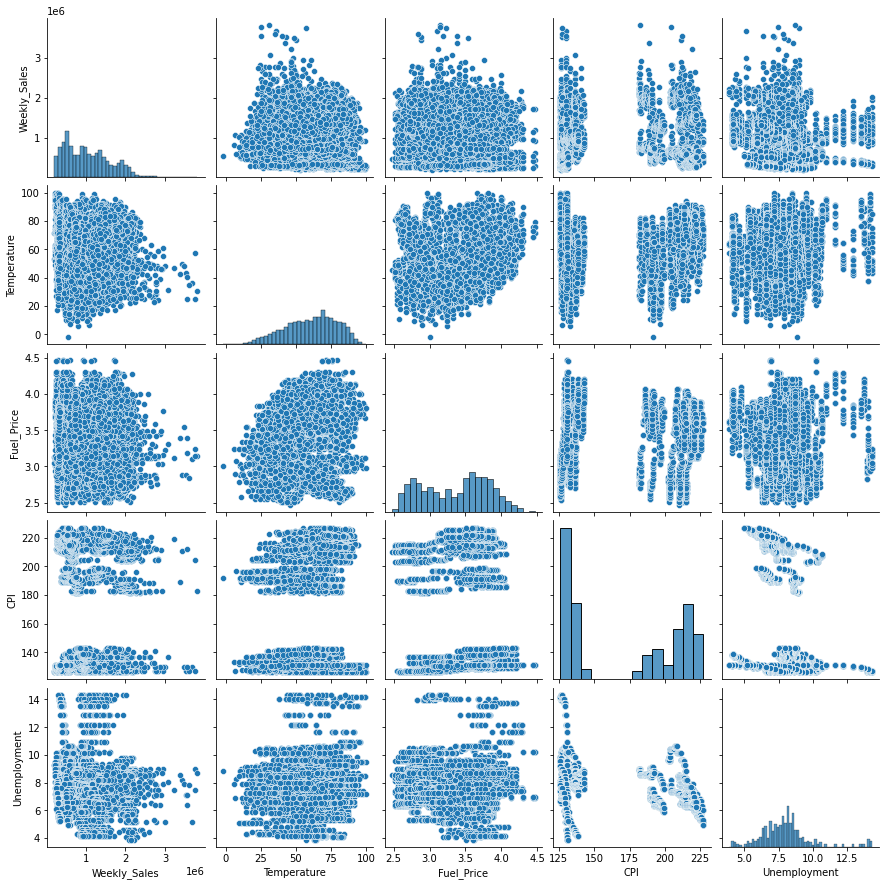

In [20]:
sns.pairplot(df_corr)
df_corr.corr()

Grafico de calor para verificarmos os valores das correlações de forma mais clara

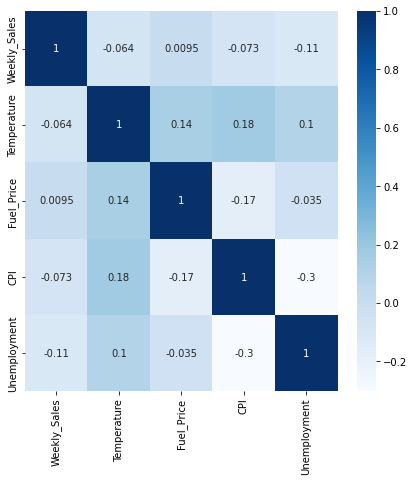

In [21]:
plt.figure(figsize = (7,7))
sns.heatmap(df_corr.corr(),  annot=True, cmap='Blues')

Separando a correlação de todas as colunas com a coluna ***Weekly_Sales***

In [22]:
df_corr.corr()['Weekly_Sales']

Weekly_Sales    1.000000
Temperature    -0.063810
Fuel_Price      0.009464
CPI            -0.072634
Unemployment   -0.106176
Name: Weekly_Sales, dtype: float64

#Verificamos que existe pouca correlação entre as colunas, a maior correlação positiva é entre ***CPI*** e ***temperature*** (0.18) e a maior correlação negativa é entre ***CPI*** e ***Unemployment*** (-0.3)



---



#hipótese 2: Os feriados tem um peso grande para as vendas

Verificando a importancia dos feriados em relação as vendas:

Criando dataframes específicos para cada feriado.

Usado a média para os valores

In [23]:
df_regular = df[df['Holiday_Type'] == 'Regular_Day'].groupby('Store').agg({'Weekly_Sales':'mean','Temperature':'mean','Fuel_Price':'mean', 'CPI':'mean','Unemployment':'mean'}).copy()
df_super = df[df['Holiday_Type'] == 'Super_Boul'].groupby('Store').agg({'Weekly_Sales':'mean','Temperature':'mean','Fuel_Price':'mean', 'CPI':'mean','Unemployment':'mean'}).copy()
df_labour = df[df['Holiday_Type'] == 'Labour_Day'].groupby('Store').agg({'Weekly_Sales':'mean','Temperature':'mean','Fuel_Price':'mean', 'CPI':'mean','Unemployment':'mean'}).copy()
df_thanks = df[df['Holiday_Type'] == 'Thanksgiving'].groupby('Store').agg({'Weekly_Sales':'mean','Temperature':'mean','Fuel_Price':'mean', 'CPI':'mean','Unemployment':'mean'}).copy()
df_christ = df[df['Holiday_Type'] == 'Christmans'].groupby('Store').agg({'Weekly_Sales':'mean','Temperature':'mean','Fuel_Price':'mean', 'CPI':'mean','Unemployment':'mean'}).copy()

Gráfico mostrando a comparação dos dias comuns com os dias dos feriados(usamos a média para essa comparação)

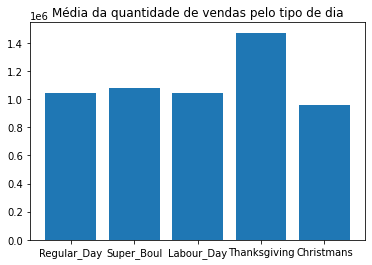

In [24]:
day_type = ['Regular_Day','Super_Boul','Labour_Day','Thanksgiving','Christmans']
total_sales = [df[df['Holiday_Type']=='Regular_Day']['Weekly_Sales'].mean(),
               df[df['Holiday_Type']=='Super_Boul']['Weekly_Sales'].mean(),
               df[df['Holiday_Type']=='Labour_Day']['Weekly_Sales'].mean(),
               df[df['Holiday_Type']=='Thanksgiving']['Weekly_Sales'].mean(),
               df[df['Holiday_Type']=='Christmans']['Weekly_Sales'].mean()]

plt.bar(day_type, total_sales)
plt.title('Média da quantidade de vendas pelo tipo de dia')
plt.show()

Grafico contendo a soma das vendas por feriados, excluimos os dias comuns por ter uma quantidade de dias muito maior

OBS: ao longo do periodo dos dados analisados ocorreram 3 feriados de Super Boul e Labour day, e somente 2 feriados de Thanksgiving e Christmans

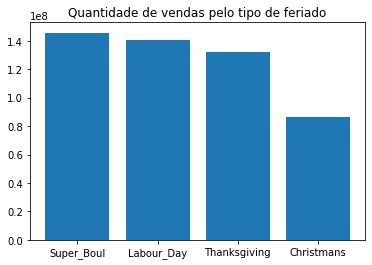

In [25]:
holiday_type = ['Super_Boul','Labour_Day','Thanksgiving','Christmans']
total_holiday = [df[df['Holiday_Type']=='Super_Boul']['Weekly_Sales'].sum(),
               df[df['Holiday_Type']=='Labour_Day']['Weekly_Sales'].sum(),
               df[df['Holiday_Type']=='Thanksgiving']['Weekly_Sales'].sum(),
               df[df['Holiday_Type']=='Christmans']['Weekly_Sales'].sum()]

plt.bar(holiday_type, total_holiday)
plt.title('Quantidade de vendas pelo tipo de feriado')
plt.show()

Como a soma das vendas dos feriados ficaram muito diferentes da média, iremos verificar o motivo

In [26]:
df['Holiday_Type'].value_counts()/45

Regular_Day     133.0
Super_Boul        3.0
Labour_Day        3.0
Thanksgiving      2.0
Christmans        2.0
Name: Holiday_Type, dtype: float64

Média de venda do feriado de ***Thanksgiving***

In [95]:
df[df['Holiday_Type']=='Thanksgiving']['Weekly_Sales'].mean()

1471273.427777778

Média de venda do feriado de ***Christmans***

In [96]:
df[df['Holiday_Type']=='Christmans']['Weekly_Sales'].mean()

960833.1115555551

Verificamos que existe alguma diferença nas vendas entre um dia comum e os dias de feriados, sendo o feriado de thanksgiving aquele que ocorre a média de maior venda (aproximadamente 1471273) e o feriado do Christmans aquele com a média de menor venda (960833).
Para este projeto foi considerado Christmans as semanas de fechamento de 30 e 31 de dezembro e verificamos que as semanas de maiores vendas ocorreram nos fechamentos de 23 e 24 de dezembro, o que fez com que o feriado de christmans tenha pouco volume de venda e os dias de maiores vendas tenha caido em dias comuns.

Os dados estão no período de 05/02/2010 a 01/11/2012, por isso ocorreram 3 feriados de Super Boul e Labour Day e 2 feriados de Thanksgiving e Christmans

O peso dos feriados não é tão grande em relação aos dias comuns.

---

#hipotese 3: Existe picos de venda ao longo do periodo

Gráfico mostrando a media de vendas ao longo do periodo

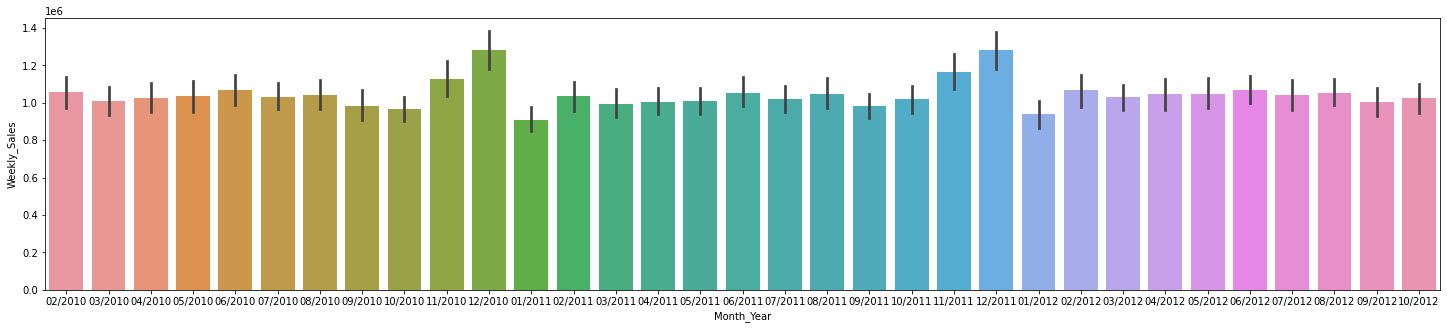

In [68]:
plt.figure(figsize=(25,5))
sns.barplot(x='Month_Year', y='Weekly_Sales', data=df)

Observando o gráfico podemos ver 2 picos: um em novembro e outro em dezembro.

Verificamos que não existe uma variação muito discrepante ao longo do periodo e também, é possivel ver que houve pouca diferença comparando o mesmo mês em cada ano.

---

#Hipótese 4:  As lojas que mais venderam apresentam uma semelhança que será usada para identificar quais se beneficiariam com uma expansão.

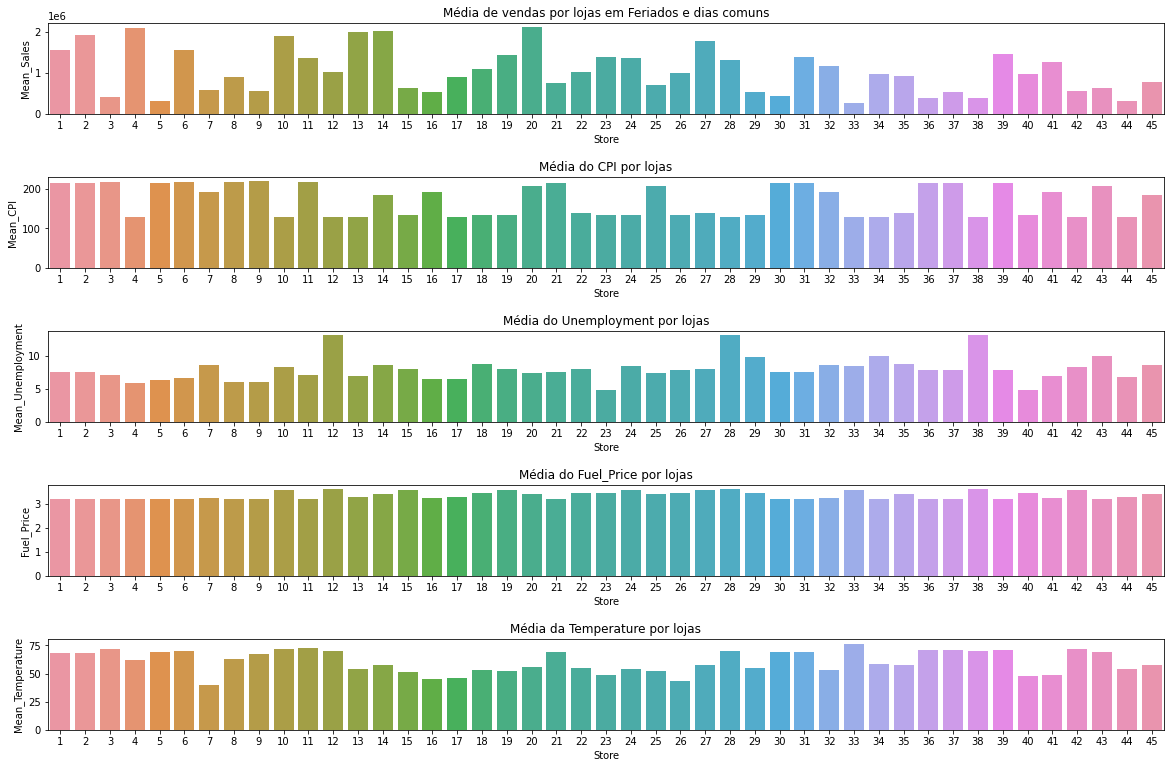

In [81]:
plt.figure(figsize=(20,13))
plt.subplots_adjust(hspace = 0.7)
plt.subplot(5,1,1)
sns.barplot(x='Store', y='Mean_Sales', data=df_loja)
plt.title('Média de vendas por lojas em Feriados e dias comuns')

plt.subplot(5,1,2)
sns.barplot(x='Store', y='Mean_CPI', data=df_loja)
plt.title('Média do CPI por lojas')

plt.subplot(5,1,3)
sns.barplot(x='Store', y='Mean_Unemployment', data=df_loja)
plt.title('Média do Unemployment por lojas')

plt.subplot(5,1,4)
sns.barplot(x='Store', y='Fuel_Price', data=df_loja)
plt.title('Média do Fuel_Price por lojas')

plt.subplot(5,1,5)
sns.barplot(x='Store', y='Mean_Temperature', data=df_loja)
plt.title('Média da Temperature por lojas')

plt.show()

Gráfico mostrando a dispersão de vendas por loja

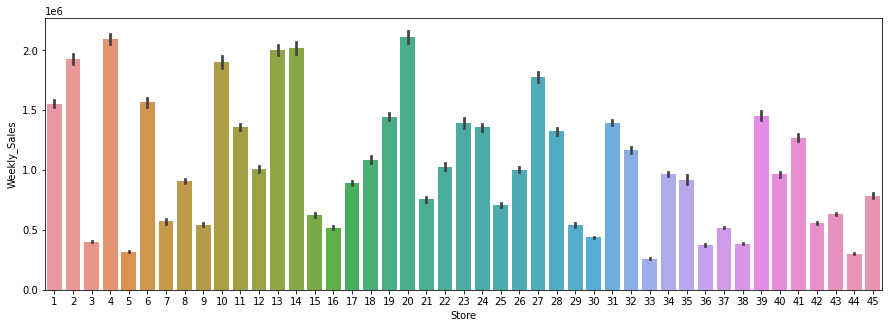

In [29]:
plt.figure(figsize=(15,5))
sns.barplot(x='Store', y='Weekly_Sales', data=df)

A partir do gráfico selecionamos as 6 lojas que mais venderam (2,4,10,13,14 e 20)

In [30]:
display(df_loja.sort_values(by=['Mean_Sales'],ascending=False).head(10))

,Store,Mean_Sales,Mean_Temperature,Fuel_Price,Mean_CPI,Mean_Unemployment
19,20,2.107677e+06,55.451399,3.417608,209.038131,7.371413
3,4,2.094713e+06,62.253357,3.216972,128.679669,5.964692
13,14,2.020978e+06,57.790979,3.417608,186.285678,8.648748
12,13,2.003620e+06,53.697133,3.286147,128.679669,7.001825
1,2,1.925751e+06,68.216364,3.219699,215.646311,7.623846
9,10,1.899425e+06,72.241189,3.575923,128.679669,8.362965
26,27,1.775216e+06,57.311119,3.578294,139.011284,8.001748
5,6,1.564728e+06,69.700000,3.219699,217.553197,6.606902
0,1,1.555264e+06,68.306783,3.219699,215.996892,7.610420
38,39,1.450668e+06,70.597343,3.219699,214.729069,7.869049


In [31]:
lista_top = [2,4,10,13,14,20]

Colocamos em ordem crescente baseada na coluna ***Mean_Sales***

In [32]:
df_tops = df_loja[df_loja.Store.isin(lista_top)]
df_tops.sort_values(by='Mean_Sales',ascending=False)

,Store,Mean_Sales,Mean_Temperature,Fuel_Price,Mean_CPI,Mean_Unemployment
19,20,2.107677e+06,55.451399,3.417608,209.038131,7.371413
3,4,2.094713e+06,62.253357,3.216972,128.679669,5.964692
13,14,2.020978e+06,57.790979,3.417608,186.285678,8.648748
12,13,2.003620e+06,53.697133,3.286147,128.679669,7.001825
1,2,1.925751e+06,68.216364,3.219699,215.646311,7.623846
9,10,1.899425e+06,72.241189,3.575923,128.679669,8.362965


Não encontramos um padrão entre as lojas mais vendidas. A loja com maior vendas apresenta uma média de CPI em torno de 209 e os valores de CPI variam entre as outras lojas que tiveram maior volume de vendas de forma aleatória, assim como as outras colunas das lojas, como temperatura, preço do combustível e taxa de desemprego.

---

Hipótese 5: Há semelhanças das vendas nas lojas considerando feriados e dias comuns





Gráfico mostrando as vendas das lojas em feriados 

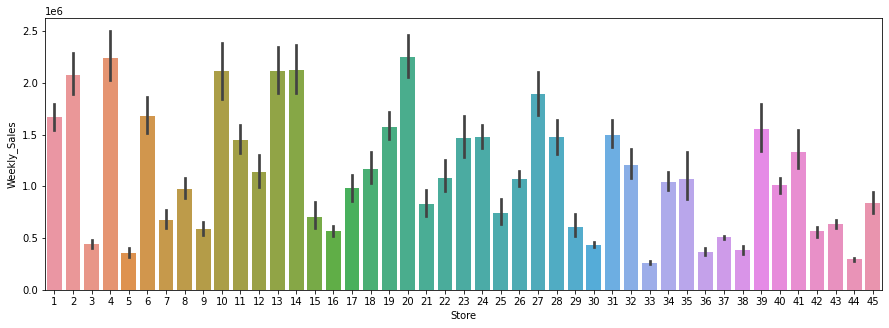

In [33]:
plt.figure(figsize=(15,5))
sns.barplot(x='Store', y='Weekly_Sales', data=df[df['Holiday_Flag']==1])

Gráfico mostrando as vendas por loja em dias comuns

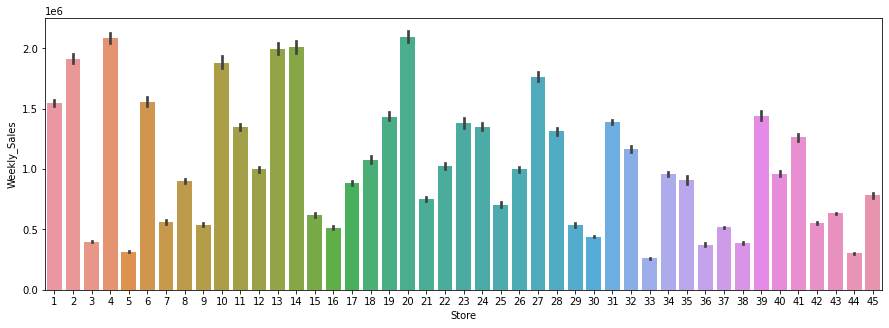

In [34]:
plt.figure(figsize=(15,5))
sns.barplot(x='Store', y='Weekly_Sales', data=df[df['Holiday_Flag']==0])

Gráfico mostrando a comparação das medias de vendas em feriados com vendas de dias normais

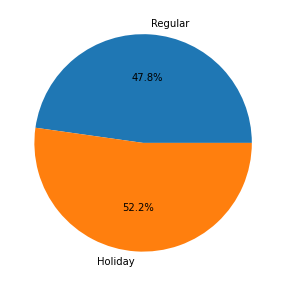

In [78]:
fig = plt.figure(figsize =(5,5))
plt.pie([df[df['Holiday_Type']=='Regular_Day']['Weekly_Sales'].mean(),
         (df[df['Holiday_Type']=='Super_Boul']['Weekly_Sales'].mean()+df[df['Holiday_Type']=='Labour_Day']['Weekly_Sales'].mean()+df[df['Holiday_Type']=='Thanksgiving']['Weekly_Sales'].mean()+df[df['Holiday_Type']=='Christmans']['Weekly_Sales'].mean())/4],
        labels = ['Regular','Holiday'],autopct='%1.1f%%')
plt.show()

A partir dos gráficos podemos observar que o volume de vendas nas lojas se comportam de forma semelhante em dias comuns e dias de feriados, e que as vendas em dias comuns tem uma média de vendas equivalente a 47,8% enquanto as vendas dos feriados 52,2% das vendas, assim podemos concluir que os feriados que tivemos acesso não demonstram uma variação muito grande para as vendas

---

#Hipótese 6: Existe um CPI que indica maiores vendas

Observando as medias dos CPI em relação as médias das vendas, para checar se existe algum padão

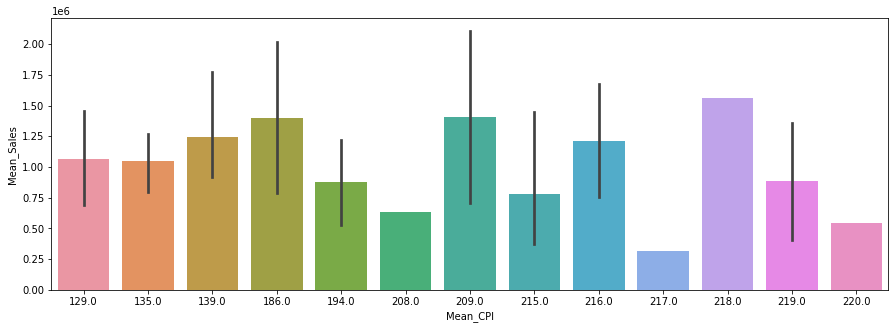

In [85]:
plt.figure(figsize=(15,5))
sns.barplot(x='Mean_CPI', y='Mean_Sales', data= df_loja.round())

Encontramos uma variação grande nos CPI comparado a venda, sendo assim não usaremos esse atributo para recomendar a loja que receberá a expansão .

mediana

In [43]:
df['CPI'].median()

182.6165205

pegando as lojas que tem cpi acima da mediana e abaixo da mediana para comparar se cpi abaixo ou acima da mediana com as vendas

In [75]:
df_loja[df_loja['Mean_CPI']>=182.6165205].head(5)

,Store,Mean_Sales,Mean_Temperature,Fuel_Price,Mean_CPI,Mean_Unemployment
0,1,1.555264e+06,68.306783,3.219699,215.996892,7.610420
1,2,1.925751e+06,68.216364,3.219699,215.646311,7.623846
2,3,4.027044e+05,71.434196,3.219699,219.391531,7.176986
4,5,3.180118e+05,69.410140,3.219699,216.565581,6.295406
5,6,1.564728e+06,69.700000,3.219699,217.553197,6.606902


In [74]:
df_loja[df_loja['Mean_CPI']<182.6165205].head(5)

,Store,Mean_Sales,Mean_Temperature,Fuel_Price,Mean_CPI,Mean_Unemployment
3,4,2.094713e+06,62.253357,3.216972,128.679669,5.964692
9,10,1.899425e+06,72.241189,3.575923,128.679669,8.362965
11,12,1.009002e+06,70.262797,3.606420,128.679669,13.116483
12,13,2.003620e+06,53.697133,3.286147,128.679669,7.001825
14,15,6.233125e+05,51.833846,3.578294,135.092607,7.996252


In [46]:
df_loja[df_loja['Mean_CPI']>=182.6165205]['Mean_Sales'].mean()

1012541.10673457

In [47]:
df_loja[df_loja['Mean_CPI']<182.6165205]['Mean_Sales'].mean()

1082953.3652447553

In [48]:
df_loja[df_loja['Mean_CPI']<182.6165205]['Mean_Sales'].mean() - df_loja[df_loja['Mean_CPI']>=182.6165205]['Mean_Sales'].mean()

70412.25851018529

Verificamos que as lojas de cpi abaixo da média vendem mais dos que as lojas com o cpi acima da media, mas achamos a diferença muito baixa para basear o projeto nessa informação.

Encontramos uma variação grande nos CPI comparado a venda, sendo assim não usaremos esse atributo para recomendar a loja que receberá a expansão .



---



#Hipótese 7: Existe algumas semanas em que todas as lojas tiveram uma quantidade de vendas baixa e outras uma quantidade de vendas alta.

Iremos agora verificar a data que teve menos venda em cada loja 

Criando a coluna ***Date_Min*** que mostra a data que as lojas tiveram mais vendas

In [49]:
date_min = list()
for x in df_sales['Min_Sales']:
  date_min.append(df[df['Weekly_Sales']==x]['Date'])

In [50]:
date_min = pd.DataFrame(date_min).transpose()

In [51]:
 def sjoin(x):
   return ';'.join(x[x.notnull()].astype(str))
date_min = date_min.groupby(level=0, axis=1).apply(lambda x: x.apply(sjoin, axis=1))

In [52]:
date_min = date_min.reset_index(drop=True)

In [87]:
df_sales['Date_Min'] = date_min['Date']
df_sales.head(5)

,Store,Mean_Sales,Max_Sales,Min_Sales,Amplitude,Date_Min,Date_Max
0,1,1.555264e+06,2387950.20,1316899.31,1071050.89,2011-01-28,2010-12-24
1,2,1.925751e+06,3436007.68,1650394.44,1785613.24,2011-09-30,2010-12-24
2,3,4.027044e+05,605990.41,339597.38,266393.03,2010-08-13,2010-12-24
3,4,2.094713e+06,3676388.98,1762539.30,1913849.68,2010-03-26,2011-12-23
4,5,3.180118e+05,507900.07,260636.71,247263.36,2011-01-14,2011-11-25


Criando a coluna ***Date_Max*** que mostra a data que as lojas tiveram mais vendas

In [54]:
date_max = list()
for x in df_sales['Max_Sales']:
  date_max.append(df[df['Weekly_Sales']==x]['Date'])

In [55]:
date_max = pd.DataFrame(date_max).transpose()

In [56]:
def sjoin(x):
  return ';'.join(x[x.notnull()].astype(str))
date_max = date_max.groupby(level=0, axis=1).apply(lambda x: x.apply(sjoin, axis=1))

In [57]:
date_max = date_max.reset_index(drop=True)

In [88]:
date_max.head(5)

,Date
0,2010-12-24
1,2010-12-24
2,2010-12-24
3,2011-12-23
4,2011-11-25


In [89]:
df_sales['Date_Max'] = date_max['Date']
df_sales.head()

,Store,Mean_Sales,Max_Sales,Min_Sales,Amplitude,Date_Min,Date_Max
0,1,1.555264e+06,2387950.20,1316899.31,1071050.89,2011-01-28,2010-12-24
1,2,1.925751e+06,3436007.68,1650394.44,1785613.24,2011-09-30,2010-12-24
2,3,4.027044e+05,605990.41,339597.38,266393.03,2010-08-13,2010-12-24
3,4,2.094713e+06,3676388.98,1762539.30,1913849.68,2010-03-26,2011-12-23
4,5,3.180118e+05,507900.07,260636.71,247263.36,2011-01-14,2011-11-25


Verificando algum padrão para os dias de menores vendas

In [60]:
df_sales['Date_Min'].value_counts()

2010-12-31    8
2011-01-28    6
2011-01-21    5
2012-01-27    4
2011-01-14    3
2011-12-30    2
2010-03-26    2
2011-09-30    2
2011-02-09    2
2012-09-28    1
2010-03-12    1
2011-07-01    1
2011-04-02    1
2011-04-22    1
2012-01-13    1
2012-07-27    1
2010-09-24    1
2010-05-14    1
2010-08-13    1
2010-02-26    1
Name: Date_Min, dtype: int64

verificamos que os dias de menores vendas ficaram,em sua maioria, na ultima semana do mês de dezembro e nas ultimas semanas do mês de janeiro.

Verificando algum padrão para os dias de maiores vendas

In [61]:
df_sales['Date_Max'].value_counts()

2010-12-24    30
2011-12-23     8
2011-11-25     1
2010-05-14     1
2010-11-26     1
2010-07-05     1
2012-06-04     1
2012-10-02     1
2010-09-17     1
Name: Date_Max, dtype: int64

In [92]:
display(df[df['Date']=='2010-12-24'].sort_values(by=['Weekly_Sales'],ascending=False).head())

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Type,Day,Month,Year,Month_Year
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.544590,8.724,Regular_Day,24,12,2010,12/2010
2763,20,2010-12-24,3766687.43,0,25.17,3.141,204.637673,7.484,Regular_Day,24,12,2010,12/2010
1333,10,2010-12-24,3749057.69,0,57.06,3.236,126.983581,9.003,Regular_Day,24,12,2010,12/2010
1762,13,2010-12-24,3595903.20,0,34.90,2.846,126.983581,7.795,Regular_Day,24,12,2010,12/2010
475,4,2010-12-24,3526713.39,0,43.21,2.887,126.983581,7.127,Regular_Day,24,12,2010,12/2010


Verificamos que a semana que houve as maiores vendas, 30 lojas das 45, foram no fechamento 24/12/10 e 8 lojas das 45 foram no fechamento 23/12/2011

---

#Hipótese 8: Uma loja com pouca amplitude pode indicar, entre outros problemas, limitação no seu espaço

Gráfico com a amplitude de cada loja

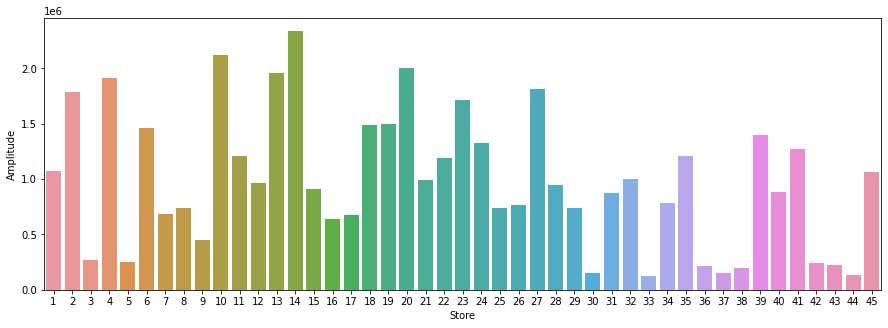

In [63]:
plt.figure(figsize=(15,5))
sns.barplot(x='Store', y='Amplitude', data= df_sales)

In [64]:
display(df_sales.sort_values(by=['Amplitude'],ascending=True))

,Store,Mean_Sales,Max_Sales,Min_Sales,Amplitude,Date_Min,Date_Max
32,33,2.598617e+05,331173.51,209986.25,121187.26,2010-03-12,2010-05-14
43,44,3.027489e+05,376233.89,241937.11,134296.78,2010-12-31,2011-12-23
29,30,4.385796e+05,519354.88,369722.32,149632.56,2011-02-09,2010-12-24
36,37,5.189003e+05,605791.46,451327.61,154463.85,2011-12-30,2011-12-23
37,38,3.857317e+05,499267.66,303908.81,195358.85,2010-12-31,2012-06-04
35,36,3.735120e+05,489372.02,270677.98,218694.04,2012-09-28,2010-07-05
42,43,6.333247e+05,725043.04,505405.85,219637.19,2011-12-30,2010-09-17
41,42,5.564039e+05,674919.45,428953.60,245965.85,2010-12-31,2012-10-02
4,5,3.180118e+05,507900.07,260636.71,247263.36,2011-01-14,2011-11-25
2,3,4.027044e+05,605990.41,339597.38,266393.03,2010-08-13,2010-12-24


In [65]:
df[df['Store']==33].head(50)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Type,Day,Month,Year,Month_Year
4576,33,2010-05-02,274593.43,0,58.40,2.962,126.442065,10.115,Regular_Day,05,02,2010,02/2010
4577,33,2010-12-02,294882.83,1,55.47,2.828,126.496258,10.115,Super_Boul,12,02,2010,02/2010
4578,33,2010-02-19,296850.83,0,62.16,2.915,126.526286,10.115,Regular_Day,19,02,2010,02/2010
4579,33,2010-02-26,284052.77,0,56.50,2.825,126.552286,10.115,Regular_Day,26,02,2010,02/2010
4580,33,2010-05-03,291484.89,0,59.17,2.877,126.578286,10.115,Regular_Day,05,03,2010,03/2010
4581,33,2010-12-03,312161.00,0,55.61,3.034,126.604286,10.115,Regular_Day,12,03,2010,03/2010
4582,33,2010-03-19,282235.73,0,64.60,3.054,126.606645,10.115,Regular_Day,19,03,2010,03/2010
4583,33,2010-03-26,262893.76,0,64.09,2.980,126.605064,10.115,Regular_Day,26,03,2010,03/2010
4584,33,2010-02-04,274634.52,0,66.79,3.086,126.603484,9.849,Regular_Day,02,04,2010,04/2010
4585,33,2010-09-04,325201.05,0,68.43,3.004,126.601903,9.849,Regular_Day,09,04,2010,04/2010


Verificamos que a loja 33 é a loja que teve a menor amplitude

---

#Conclusão

## Concluimos, baseado nos dados que tivemos acesso, que: 
### A maior correlação positiva é entre CPI e temperature (0.18) e a maior correlação negativa é entre CPI e Unemployment (-0.3).Por serem próximos a zero existe pouca correlação, conforme analisamos na hipótese 1.
###Os dados estão no período de 05/02/2010 a 01/11/2012, por isso ocorreram 3 feriados de Super Boul e Labour Day e 2 feriados de Thanksgiving e Christmans
###Verificamos que existe alguma diferença nas vendas entre um dia comum e os dias de feriados, sendo o feriado de thanksgiving aquele que ocorre a média de maior venda (aproximadamente 1471273) e o feriado do Christmans aquele com a média de menor venda (aproximadamente 960833). Para este projeto foi considerado Christmans as semanas de fechamento de 30 e 31 de dezembro e verificamos que as semanas de maiores vendas ocorreram nos fechamentos de 23 e 24 de dezembro, o que fez com que o feriado de christmans tenha pouco volume de venda e os dias de maiores vendas tenha caido em dias comuns.
###O peso dos feriados não é tão grande em relação aos dias comuns, conforme analisamos na hipótese 2.
###Verificamos que não existe uma variação muito discrepante ao longo do periodo e também, é possivel ver que houve pouca diferença comparando o mesmo mês em cada ano, conforme analisamos na hipótese 3.
###Não encontramos um padrão entre as lojas mais vendidas. A loja com maior vendas apresenta uma média de CPI em torno de 209 e os valores de CPI variam entre as outras lojas que tiveram maior volume de vendas de forma aleatória, assim como as outras colunas das lojas, como temperatura, preço do combustível e taxa de desemprego, conforme analisamos na hipótese 4.
###O volume de vendas nas lojas se comportam de forma semelhante em dias comuns e dias de feriados, e que as vendas em dias comuns tem uma média de vendas equivalente a 47,8% enquanto as vendas dos feriados 52,2% das vendas, assim podemos concluir que os feriados que tivemos acesso não demonstram uma variação muito grande para as vendas, conforme analisamos na hipótese 5
###Encontramos uma variação grande nos CPI comparado a venda, sendo assim não usaremos esse atributo para recomendar a loja que receberá a expansão.Verificamos que as lojas de cpi abaixo da média vendem mais dos que as lojas com o cpi acima da media, mas achamos a diferença muito baixa para basear o projeto nessa informação. Encontramos uma variação grande nos CPI comparado a venda, sendo assim não usaremos esse atributo para recomendar a loja que receberá a expansão, conforme analisamos na hipótese 6.
###Verificamos que os dias de menores vendas ficaram,em sua maioria, na ultima semana do mês de dezembro e nas ultimas semanas do mês de janeiro. Verificamos que a semana que houve as maiores vendas, 30 lojas das 45, foram no fechamento 24/12/10 e 8 lojas das 45 foram no fechamento 23/12/2011, conforme analisamos na hipótese 7.
###Verificamos que a loja 33 é a loja que teve a menor amplitude (Aproximadamente 121187), conforme analisamos na hipótese 8. Isso indica que algum fator está limitando as vendas dessa loja mais do que as outras, podendo este ser o seu tamanho. Por isso, ela é a nossa indicação para receber o investimento da expansão.

##Precisariamos de mais informações como: tamanho da loja, periodo de funcionamento, população, qualidade do serviço, satisfação do cliente, estacionamento, concorrencia local entre outros para afirmar com mais acuracia se essa realmente é a melhor loja para expansão.


